In [7]:
pip install apriori-python

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import pandas as pd
from random import sample 
import matplotlib.pyplot as plt
from apriori_python import apriori

# Workshop 1A: Make grocery recommendations using association rules


In [9]:
# load the grocery dataset (original dataset obtained from Kaggle)

file =r"D:\bigdata\RSC\day1\workshop1\Groceries_dataset.csv"
trans = pd.read_csv(file) # load in the purchase tranactions
trans.columns = ['user','datetime','item']
print(trans.head(5))
print(trans.shape)
allitems = np.unique(trans.item)
print("num items=",len(allitems)) # derive the distinct items

 # group transactions into baskets (a series of lists)
baskets = trans.groupby('user')['item'].apply(list)
baskets 

   user    datetime              item
0  1808  21-07-2015    tropical fruit
1  2552  05-01-2015        whole milk
2  2300  19-09-2015         pip fruit
3  1187  12-12-2015  other vegetables
4  3037  01-02-2015        whole milk
(38765, 3)
num items= 167


user
1000    [soda, canned beer, sausage, sausage, whole mi...
1001    [frankfurter, frankfurter, beef, sausage, whol...
1002    [tropical fruit, butter milk, butter, frozen v...
1003    [sausage, root vegetables, rolls/buns, deterge...
1004    [other vegetables, pip fruit, root vegetables,...
                              ...                        
4996    [dessert, salty snack, rolls/buns, misc. bever...
4997    [tropical fruit, white wine, whole milk, curd,...
4998                                   [rolls/buns, curd]
4999    [bottled water, butter milk, tropical fruit, b...
5000    [soda, bottled beer, fruit/vegetable juice, ro...
Name: item, Length: 3898, dtype: object

In [10]:
# do some simple data visualisation/data exploration

# define a function to return the unique set of all items (as a freq dictionary)
def itemcounts(itemsets):
    allitems = dict()
    for its in itemsets:
        for i in its:
            if i in allitems.keys():
                allitems[i] = allitems[i] + 1
            else:
                allitems[i] = 1  
    return allitems

itemfreqcnts = itemcounts(baskets) # count item frequencies
sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True) # reverse sort by frequency

[('whole milk', 2502),
 ('other vegetables', 1898),
 ('rolls/buns', 1716),
 ('soda', 1514),
 ('yogurt', 1334),
 ('root vegetables', 1071),
 ('tropical fruit', 1032),
 ('bottled water', 933),
 ('sausage', 924),
 ('citrus fruit', 812),
 ('pastry', 785),
 ('pip fruit', 744),
 ('shopping bags', 731),
 ('canned beer', 717),
 ('bottled beer', 687),
 ('whipped/sour cream', 662),
 ('newspapers', 596),
 ('frankfurter', 580),
 ('brown bread', 571),
 ('domestic eggs', 566),
 ('pork', 566),
 ('butter', 534),
 ('fruit/vegetable juice', 518),
 ('beef', 516),
 ('curd', 514),
 ('margarine', 491),
 ('coffee', 476),
 ('frozen vegetables', 425),
 ('chicken', 422),
 ('white bread', 362),
 ('cream cheese ', 358),
 ('chocolate', 357),
 ('dessert', 356),
 ('napkins', 335),
 ('hamburger meat', 327),
 ('berries', 327),
 ('UHT-milk', 323),
 ('onions', 305),
 ('salty snack', 283),
 ('waffles', 280),
 ('long life bakery product', 269),
 ('sugar', 265),
 ('butter milk', 263),
 ('ham', 256),
 ('meat', 254),
 ('froz

<BarContainer object of 20 artists>

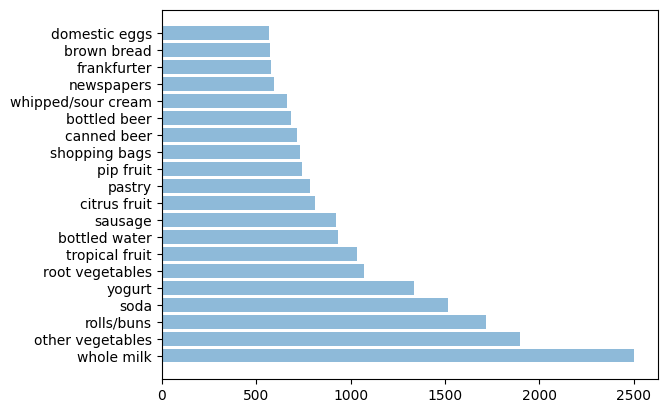

In [11]:
# FYI: display as histogram
rankeditems = [k for k,v in sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True)]
frequencies = [v for k,v in sorted(itemfreqcnts.items(), key=lambda kv: kv[1], reverse=True)]
topN=20
plt.barh(rankeditems[0:topN], frequencies[0:topN], align='center', alpha=0.5)

In [12]:
# generate the association rules
# experiment with different support and confidence values

freqItemSet, rules = apriori(baskets, minSup=0.01, minConf=0.1)
len(rules) 

9726

In [13]:
# display a sample of the rules
for i in range(20): print(rules[i])

[{'bottled beer'}, {'domestic eggs', 'whole milk'}, 0.10016155088852989]
[{'bottled beer'}, {'other vegetables', 'pastry'}, 0.10016155088852989]
[{'bottled beer'}, {'yogurt', 'tropical fruit'}, 0.10016155088852989]
[{'whole milk', 'soda'}, {'other vegetables', 'canned beer'}, 0.100169779286927]
[{'whole milk', 'soda'}, {'yogurt', 'citrus fruit'}, 0.100169779286927]
[{'whole milk', 'soda'}, {'other vegetables', 'frankfurter'}, 0.100169779286927]
[{'whole milk', 'soda'}, {'rolls/buns', 'tropical fruit'}, 0.100169779286927]
[{'domestic eggs'}, {'whole milk', 'newspapers'}, 0.1001926782273603]
[{'other vegetables', 'yogurt'}, {'chicken'}, 0.10021321961620469]
[{'other vegetables', 'yogurt'}, {'whole milk', 'newspapers'}, 0.10021321961620469]
[{'other vegetables', 'yogurt'}, {'pip fruit', 'soda'}, 0.10021321961620469]
[{'coffee'}, {'rolls/buns', 'tropical fruit'}, 0.10044642857142858]
[{'whole milk', 'bottled water'}, {'pip fruit', 'rolls/buns'}, 0.1004566210045662]
[{'whole milk', 'bottled

In [14]:
# a nicer rules display, that shows the highest confidence rules first
def showrules(rules, N=20):
  for L, R, C in reversed(rules): 
      print("cf={:.4f}".format(C)," ",L,"=>\t",R)
      N = N-1
      if N <= 0: break

showrules(rules)

cf=0.7843   {'domestic eggs', 'meat'} =>	 {'whole milk'}
cf=0.7500   {'fruit/vegetable juice', 'chocolate'} =>	 {'whole milk'}
cf=0.7455   {'other vegetables', 'yogurt', 'rolls/buns', 'bottled water'} =>	 {'whole milk'}
cf=0.7407   {'pip fruit', 'yogurt', 'bottled water'} =>	 {'whole milk'}
cf=0.7353   {'brown bread', 'yogurt', 'rolls/buns'} =>	 {'whole milk'}
cf=0.7231   {'brown bread', 'other vegetables', 'bottled water'} =>	 {'whole milk'}
cf=0.7200   {'yogurt', 'bottled beer', 'rolls/buns'} =>	 {'whole milk'}
cf=0.7119   {'curd', 'yogurt', 'soda'} =>	 {'whole milk'}
cf=0.7091   {'other vegetables', 'yogurt', 'rolls/buns', 'shopping bags'} =>	 {'whole milk'}
cf=0.7069   {'domestic eggs', 'rolls/buns', 'sausage'} =>	 {'whole milk'}
cf=0.7069   {'pip fruit', 'pastry', 'yogurt'} =>	 {'whole milk'}
cf=0.7031   {'pip fruit', 'hamburger meat'} =>	 {'whole milk'}
cf=0.7011   {'other vegetables', 'butter', 'yogurt'} =>	 {'whole milk'}
cf=0.7000   {'butter', 'cream cheese '} =>	 {'whole milk

In [15]:
# show each unique item (rule RHS) that can be recommended by the ruleset and the number of rules that recommend that item

def RHSitems(rules):
    allitems = dict()
    for LHS, RHS, conf in rules:
        for item in RHS:
            if item in allitems.keys():
                allitems[item] = allitems[item] + 1
            else:
                allitems[item] = 1
    return allitems

ruleRHSitems = RHSitems(rules)
print("number of recommendable items=",len(ruleRHSitems))
ruleRHSitems 

number of recommendable items= 45


{'domestic eggs': 127,
 'whole milk': 2185,
 'other vegetables': 1540,
 'pastry': 283,
 'yogurt': 924,
 'tropical fruit': 471,
 'canned beer': 236,
 'citrus fruit': 278,
 'frankfurter': 148,
 'rolls/buns': 1331,
 'newspapers': 151,
 'chicken': 61,
 'pip fruit': 266,
 'soda': 955,
 'shopping bags': 274,
 'sausage': 533,
 'dessert': 26,
 'bottled beer': 221,
 'root vegetables': 530,
 'hamburger meat': 22,
 'white bread': 45,
 'brown bread': 151,
 'UHT-milk': 20,
 'bottled water': 509,
 'cream cheese ': 42,
 'salty snack': 3,
 'beverages': 2,
 'napkins': 17,
 'berries': 19,
 'frozen vegetables': 71,
 'waffles': 5,
 'chocolate': 50,
 'whipped/sour cream': 169,
 'coffee': 79,
 'curd': 121,
 'beef': 91,
 'butter': 124,
 'sugar': 5,
 'onions': 8,
 'meat': 2,
 'pork': 108,
 'fruit/vegetable juice': 116,
 'margarine': 88,
 'ham': 1,
 'frozen meals': 1}

In [16]:
# to test the rules we first divide the baskets into training and test sets and then rebuild the ruleset
testsize = int(len(baskets)*0.1); testsize # set the size of the test set
testids  = sample(list(baskets.index),testsize)
trainids = list(set(baskets.index) - set(testids))
trainbaskets = baskets[trainids]
testbaskets  = baskets[testids]

In [17]:
# for correct testing we rebuild the ruleset using the training baskets only
freqItemSet, rules = apriori(trainbaskets, minSup=0.05, minConf=0.1)
print("number of rules generated=",len(rules)) 

number of rules generated= 250


In [18]:
# Define a function to input a basket and a ruleset and then execute those rules
# in the ruleset where any subset of the basket matches the rule LHS.
# Output a list of tuples: (item, confidence) for the topN items output by the rules with highest confidence
# Ignore rules if the rule RHS is also within the LHS (eg ignore "if A and B then A").
# If many rules output the same item then return the highest confidence for that item.
def execrules_anymatch(itemset,rules,topN=10):
    preds = dict()
    for LHS, RHS, conf in rules:
        if LHS.issubset(itemset):
            for pitem in RHS:
                # ignore rules like A => A
                if not pitem in itemset:
                    if pitem in preds.keys():
                        preds[pitem] = max(preds[pitem],conf)
                    else:
                        preds[pitem] = conf                
    recs = sorted(preds.items(), key=lambda kv: kv[1], reverse=True)
    return recs[0:min(len(recs),topN)]

In [19]:
# make recommendations for one basket in the testset (e.g. for one user at basket checkout time)
# results are output in decreasing order of rule confidence
userID = 1
testbasket = testbaskets.iloc[userID]
print("selected user's basket=",testbasket,"\nrecommended items=")
execrules_anymatch(testbasket, rules) # anymatch allows any subset of the testbasket to match a rule LHS

selected user's basket= ['beef', 'frankfurter', 'whole milk', 'beef', 'soda', 'rolls/buns', 'berries', 'pip fruit', 'pastry', 'other vegetables', 'bottled water', 'ketchup', 'pastry', 'semi-finished bread'] 
recommended items=


[('yogurt', 0.3858858858858859),
 ('tropical fruit', 0.2696122633002705),
 ('sausage', 0.26876876876876876),
 ('root vegetables', 0.25969341749323716),
 ('citrus fruit', 0.20843471208434713),
 ('shopping bags', 0.2073940486925158),
 ('bottled beer', 0.19003115264797507),
 ('canned beer', 0.18815896188158962),
 ('whipped/sour cream', 0.17848970251716248),
 ('newspapers', 0.16382806163828062)]

In [20]:
# we can make up a new basket using any items in the inventory
testbasket = ['frozen meals','sausage']
execrules_anymatch(testbasket, rules)

[('whole milk', 0.5284327323162274),
 ('other vegetables', 0.4549237170596394),
 ('rolls/buns', 0.40221914008321774),
 ('soda', 0.3800277392510402),
 ('yogurt', 0.3633841886269071),
 ('root vegetables', 0.27323162274618584),
 ('tropical fruit', 0.26768377253814146)]

In [21]:
# Define a Holdout test for a set of association rules on a testset, also compute rule lift over random.
# For each basket: do tpb (testsperbasket) tests by holding out in turn the first, second, third etc items in the testitems.
# Compute a random recommendation only when a rule-based recommendation is also made (for accurate comparison with the ruleset).
# We assume virtual items (if any) occur at the start of the basket:
# usually virtual items (eg age, gender) are not items that we wish to recommend hence testitemstart indicates 
# the start of the items that are to be tested (ie can be recommended).

def rulehits_holdout_lift(testbaskets, rules, allitems, topN=10, tpb=5, itemstart=0):
    tothits = tottests = totrecs = totrhits = totrrecs = 0
    for testbasket in testbaskets:
        virtualitems = testbasket[:itemstart]
        testitems   = testbasket[itemstart:]
        numtests = min(len(testitems),tpb)
        for i in range(0,numtests):
            recs = execrules_anymatch(virtualitems+testitems[:i]+testitems[i+1:], rules, topN) # omit (holdout) the ith testitem
            nrecs = len(recs)
            if (nrecs > 0):
                recitems = set()
                for item, conf in recs: recitems.add(item) # strip out the confidences
                tothits = tothits + int(testitems[i] in recitems) # increment if testitem is in the recommended items
                totrecs = totrecs + nrecs
                tottests = tottests + 1
                # now do the random recommendations
                unseenitems = set(allitems) - set(testitems[:i]+testitems[i+1:]) # remove the testbasket items (except the holdout)
                recitems = sample(unseenitems,min(topN,len(unseenitems),nrecs))
                nrecs = len(recitems)
                totrhits = totrhits + int(testitems[i] in recitems) # increment if testitem is in the recommended items
                totrrecs = totrrecs + nrecs
    if (totrecs == 0 or totrrecs == 0 or totrhits == 0):
        print("no recommendations made, please check your inputs")
        return np.nan
    print("number of holdbacks=",tottests,
          "recommendeditems=",totrecs,
          "hits=",tothits,
          "({:.2f}%)".format(tothits*100/totrecs),
          "randomrecommendeditems=",totrrecs,
          "randomhits=",totrhits,
          "({:.2f}%)".format(totrhits*100/totrrecs),
          "rulelift={:.2f}".format((tothits/totrecs)/(totrhits/totrrecs))) 
    return tothits, totrecs, tottests, totrhits, totrrecs

In [22]:
# test the ruleset on the testset using holdout_1 testing ....
# we set topN = 5 and tests per basket (tpb) = 5

# Are the rules better than random? check the lift over random

_ = rulehits_holdout_lift(testbaskets, rules, allitems, topN=5, tpb=5)

TypeError: Population must be a sequence.  For dicts or sets, use sorted(d).

# Workshop 1B: Apply association mining to a web browsing session.


This dataset records visits to the microsoft website (www.microsoft.com) for a one week period. Each record is a cookieID plus a webpage categoryID (vroot ID). Predicting the next webpage category (vroot) a user might view can be useful for website optimisation and/or for recommending unseen content

In [ ]:
# load the data
file = "/content/drive/My Drive/recsys/anonymous-msweb-transactions.txt"

import pandas as pd
trans = pd.read_csv(file,sep = '\s+') 
trans.columns = ['user','item']
print("num distinct vroots =",trans.item.nunique())
trans[0:10]

In [ ]:
# load the vroot names (titles and URL's) and create a look-up dictionary (cmap)
file = "/content/drive/My Drive/recsys/anonymous-vrootnames-msweb.csv"
pagecatnames = pd.read_csv(file) 
pagecatnames.columns = ['item','title','vroot']
pagecatnames['title'] = pagecatnames['title'].str.strip()
print("number distinct vroots=",len(pagecatnames['vroot'].unique()))
print(pagecatnames[0:10]) # show a sample
cmap = dict(zip(pagecatnames['item'],pagecatnames['vroot']))
len(cmap)

In [ ]:
# join the two datasets and create one basket per user
trans = pd.merge(trans, pagecatnames, on="item")
allitems = np.unique(trans.title)
print("number of titles in the website log=",len(allitems))
baskets = trans.groupby('user')['title'].apply(list)  # convert transactions into baskets (a series of lists)
baskets[0:30] # show a sample of the baskets

In [ ]:
# Now proceed as above in (1A) to answer the workshop quiz questions

# Workshop 1C: Make grocery recommendations using associations derived from purchases and also from user demographics


This dataset is in tabular format (one row per user). We will do two tests and compare the results: 
1.   test using only the grocery items to build the rules
2.   test using grocery items and user demographics (as virtual items) to build the rules




In [ ]:
# load in the data
file = "/content/drive/My Drive/recsys/baskets.txt"
users = pd.read_csv(file) 
users[0:10]

Test1

In [ ]:
# for test1 we remove the demographic & account columns - leaving only the items purchased
users.drop(['cardid','value', 'pmethod', 'sex', 'homeown', 'income', 'age'], inplace=True, axis=1) 
users[0:10]

In [ ]:
# before converting to baskets, we replace the value T in all of the grocery variables with the groceryname
# and replace the value F with blank 
groceryitems = list(users.columns); groceryitems
for col in groceryitems: users[col] = np.where(users[col]=='T', col, '')  # if the item was not in the basket then leave value blank
users

In [ ]:
# convert each dataframe row into a basket (a list) and
# assemble all baskets into a series (suitable for the apriori library)

#first we define a function to do this (hence highlight all of the function below and execute)
def df2Baskets(users):
    baskets = users.values.tolist()
    newbaskets = list()
    for basket in baskets:
        while ('' in basket): basket.remove('') # remove the empty items
        if (len(basket) > 0): newbaskets.append(basket)
    return(pd.Series(newbaskets))

#now apply the function    
baskets = df2Baskets(users)
baskets

In [ ]:
# split the baskets into train and test sets
testsize = 100
testids  = sample(list(baskets.index),testsize)
trainids = list(set(baskets.index) - set(testids))
trainbaskets = baskets[trainids]
testbaskets  = baskets[testids]

In [ ]:
# build the rules, remember to experiment with different values for min.support and min.confidence
freqItemSet, rules = apriori(baskets, minSup=0.01, minConf=0.1)
print("number of rules generated=",len(rules)) 

In [ ]:
# do holdout1 test - are the results better than random?
_ = rulehits_holdout_lift(testbaskets, rules, groceryitems, topN=10, tpb=5)

In [ ]:
# try different values for topN, what do the results tell you?
# try running the below code a few times, the lifts may vary due to the randomness of the random recommendations
for n in range(1,10):
  print("topN=",n,end=" ")
  _ = rulehits_holdout_lift(testbaskets, rules, groceryitems, topN=n, tpb=10)

Test2

In [ ]:
# for test2 we include the card holders demographics
users = pd.read_csv(file)  # re-read the data
users.drop(['cardid'], inplace=True, axis=1) # only drop cardID, keep all other fields
users[0:10]

# Question: why do we need to drop cardID?

In [ ]:
# the numerical fields must be converted to categorical variables for association mining
# create a function to convert a number into a category based on a set of thresholds
def tobucket(val,name,thresholds):
    prevthresh = 0
    for thresh in thresholds:
        if val <= thresh: return f'{name}{prevthresh}-{thresh}'
        prevthresh = thresh
    return f'{name}>={thresh}' 

In [ ]:
# apply the function to the numerical variables, overwrite the original data
users['value']  = [tobucket(x,'transval:',[10,20,30,40]) for x in users['value']]
users['income'] = [tobucket(x,'income:',[10000,20000,30000]) for x in users['income']]
users['age']    = [tobucket(x,'age:',[10,20,30,40]) for x in users['age']]
users[0:10]

In [ ]:
# before converting to baskets, we replace the value T in all of the grocery variables with the groceryname and set the F values to blanks
# this ensures that the baskets only contain grocery items that were purchased and not items that were not purchased
for col in groceryitems:
  users[col] = np.where(users[col]=='T', col, '') 
# we also do same for homeown variable
users['homeown'] = np.where(users['homeown']=='YES', 'homeown', '') 
users[0:10]

In [ ]:
#now convert to basket format
baskets = df2Baskets(users)
baskets[0] # inspect the first one, you can see that it contains virtual items and real purchased items

In [ ]:
# divide into training and testsets using same indexes (same trainids and testids) as used in test1 above
trainbaskets = baskets[trainids]
testbaskets  = baskets[testids]

In [ ]:
# build a new ruleset and examine the top rules (by confidence)
# can you draw any obvious conclusions by inspecting the rules (e.g. make any easy discoveries)?

# remember to experiment with different support and confidence values

freqItemSet, rules = apriori(trainbaskets, minSup=0.05, minConf=0.1)
print("number of rules generated=",len(rules)) 
showrules(rules)

In [ ]:
# the rules may contain non-grocery items in their RHS
# we must remove these since our goal is only to recommend groceryitems
groceryrules =list()
for LHS, RHS, conf in rules:
    intersect = set(groceryitems).intersection(RHS)
    if len(intersect) > 0: 
        groceryrules.append([LHS,intersect,conf])       
print(len(groceryrules))
showrules(groceryrules) # examine the top rules

In [ ]:
# Do the holdout test

# In the below function call we pass "itemstart=6" as an argument, 
# this tells the holdout test function to ignore the first 6 items in the basket (the user demographics) since these are not suitable test items

# Try running the below a few times, the lifts may vary due to the randomness of the random recommendations
# does including demographic information in the rules improve the recommendation performance? 

for n in range(1,10):
   print("topN=",n,end=" ")
   _ = rulehits_holdout_lift(testbaskets, groceryrules, groceryitems, topN=n, tpb=10, itemstart=6)  

# Workshop 1D: Make recommendations using classification models

We compare the recommendations obtained using the association rules derived in workshop 1C with the recommendations obtained using a decision tree classifier (or any other supervised prediction model type you choose) to build one decision model per item. This is also a familiarity/refresher exercise for using sklearn prediction models and decision trees.

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# re-load the baskets data
file = "/content/drive/My Drive/recsys/baskets.txt"
users = pd.read_csv(file) 
del users['cardid'] 
users[0:10]

In [ ]:
# replace the value T/F in all of the grocery variables with the grocery item name
# (if we don't do this then the one-hot encoded variables will be auto-assigned the names 'T' and 'F')
groceryitems = ['fruitveg', 'freshmeat', 'dairy', 'cannedveg', 'cannedmeat','frozenmeal', 'beer', 'wine', 'softdrink', 'fish', 'confectionery']
for col in groceryitems:
    users[col] = np.where(users[col]=='T', col, 'none') 
users['homeown'] = np.where(users['homeown']=='YES', 'homeown', 'none')  # also do same for homeown variable

# one-hot encode all of the categorical variables
# after one-hot encoding a variable, we delete the original (unencoded) variable
catvars = set(users.columns)-set(('value','income','age')); catvars
for v in catvars:
    onehot = pd.get_dummies(users[v])
    if 'none' in list(onehot.columns): onehot.drop('none', inplace=True, axis=1)
    users.drop(v, inplace=True, axis = 1)
    users = users.join(onehot)
 
# view the preprocessed dataset (do a visual check for correctness)
users[0:10]

In [ ]:
# create train and test split
testsize = int(len(users)*0.2); testsize # set the size of the test set (20%)
testnames = set(sample(list(users.index),testsize)); len(testnames) 
trainnames = set(users.index) - testnames;  len(trainnames)
train = users.loc[trainnames,]
test = users.loc[testnames]
print("trainset size=",train.shape,"testset size=",test.shape)

In [ ]:
# build a decision tree classifier for one of the grocery items
target = 'fruitveg' # select the target item, any item will do
inputvars = list(set(users.columns) - set([target]))
tclf = tree.DecisionTreeClassifier()
tclf.fit(train[inputvars],train[target])

In [ ]:
# view the tree method1
text_representation = tree.export_text(tclf, feature_names=inputvars)
print(text_representation)

In [ ]:
# view the tree method2
plt.rcParams['figure.dpi'] = 200 # adjust to get the plot resolution you want
_ = tree.plot_tree(tclf, feature_names=inputvars, class_names=target, filled=True)

In [ ]:
# test the tree
# the below code will generate the precision, recall and confusion matrix for the tree when applied to the test set
# (note: interpreting these test statistics was taught in the EBAC core modules)
preds = tclf.predict(test[inputvars])
print(classification_report(test[target],preds))
print("confusion matrix: rows = actual, cols = predictions, e.g. False positives = cell(0,1)")
print(confusion_matrix(test[target], preds)) 

In [ ]:
# Experiment with different tree pruning amounts to try to get the best accuracy.
# In the below code we specify pruning using the "min_samples_leaf" argument.
# Can also try different pruning methodes (read the skikit manual page for DecisionTreeClassifier).

tclf = tree.DecisionTreeClassifier(min_samples_leaf=20)
tclf.fit(train[inputvars],train[target])
preds = tclf.predict(test[inputvars])
print(classification_report(test[target],preds))
print(confusion_matrix(test[target], preds))

In [ ]:
# FYI: can also display the prediction probabiities
# each prediction is shown as a pair or probabilties (for class=F and class=T)
predprobability = tclf.predict_proba(test[inputvars])
print("FYI: a sample of the predictions, shown as probabilities:")
print(predprobability[0:10])

In [ ]:
# To make item recommendations, we first build one tree for each grocery item and store in a dictionary
trees = dict()
for target in groceryitems:
    inputvars = list(users.columns)
    inputvars.remove(target)
    clf = tree.DecisionTreeClassifier(min_samples_leaf=20)
    clf.fit(train[inputvars],train[target])
    print(target,', tree size=',clf.tree_.node_count) # size of the tree
    trees[target] = clf

In [ ]:
# define a holdout test function to make and test recommendations for each test user using a set of classifiers (one for each item) 
# (note: this function is very similar to the holdout test function created for testing association rules in workshop 1A)
def classifierhits_holdout_lift(classifiers,testset,allitems,topN=1):
    hits = randhits = tests = 0
    allpreds = list()
    for username in testset.index:
        user = testset.loc[[username]] # extract user as dataframe
        for testitem in allitems:
            if (user.loc[username,testitem] == 1): # its been bought by user hence can use as a holdback (test) item
                tests += 1
                probs = dict()
                unseenitems = list()
                user.loc[username,testitem] = 0 # blank out value
                # make a prediction (exec the corresponding tree) for every item not yet seen/bought by user
                for unseenitem in allitems: 
                    if (user.loc[username,unseenitem] == 0):  # its a valid unseen item
                        unseenitems.append(unseenitem)
                        inputvars = list(user.columns)
                        inputvars.remove(unseenitem)
                        pred = classifiers[unseenitem].predict_proba(user[inputvars])
                        probs[unseenitem] = pred[0][1] # get prob for class = True (the second element), Note: can check order returned with clf.classes_
                user.loc[username,testitem] = 1 # restore holdback value
                recs = sorted(probs.items(), key=lambda kv: kv[1], reverse=True) # sort unseen items by reverse probability
                numrecs = min(len(recs),topN)
                for item, conf in recs[0:numrecs]:
                    if (item == testitem):
                        hits += 1; break
                if (testitem in sample(unseenitems,numrecs)): randhits += 1 # make random recommedations           
                allpreds.append((testitem,recs[0:numrecs])) # record the recommendations made
    lift = hits/randhits if randhits > 0 else np.nan
    print("tests=",tests,"rulehits=",hits,"randhits=",randhits,"lift=", lift)
    return tests, hits, randhits, allpreds

In [ ]:
# test the recommendations for a range of topN values
# are the results better than the association rule results?
# (note: try running the below a few times, the lifts may vary due to the randomness of the random recommendations)
for n in range(1,5): 
    print("topN=",n,end=" ")       
    _ = classifierhits_holdout_lift(trees, test, groceryitems, topN=n)